# Imports

In [1]:
# Import classic and useful libraries
import pandas as pd 
import numpy as np 
from string import punctuation
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk import WordNetLemmatizer
import matplotlib.pyplot as plt
import stop_words


In [2]:
# Project Gutenberg is a library of over 60,000 free eBooks
# Checkout at http://www.gutenberg.org/

In [3]:
nltk.download('gutenberg')
alice_raw = nltk.corpus.gutenberg.raw('carroll-alice.txt')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/lemeillefrancois/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [4]:
# We will work with a whole book for this Hands-On : Alice ' s Adventures in Wonderland

In [5]:
alice_sentences = nltk.sent_tokenize(alice_raw)
print("Number of sentences identified in the book:", len(alice_sentences))
alice_sentences[10]

Number of sentences identified in the book: 1625


'First, she tried to look down and make out what\nshe was coming to, but it was too dark to see anything; then she\nlooked at the sides of the well, and noticed that they were filled with\ncupboards and book-shelves; here and there she saw maps and pictures\nhung upon pegs.'

In [6]:
alice_sentences[10]

'First, she tried to look down and make out what\nshe was coming to, but it was too dark to see anything; then she\nlooked at the sides of the well, and noticed that they were filled with\ncupboards and book-shelves; here and there she saw maps and pictures\nhung upon pegs.'

## Apply processing

In [7]:
stop_words = nltk.corpus.stopwords.words("english")
stop_char = stop_words + list(punctuation)

In [8]:
# Tips : You can also import the list of punctuation character instead of manually defining them
#list(punctuation)

In [9]:
def preprocessing(sentence):
    """ Basic processing of a document, word by word. 
    Outputs a list of processed tokens
    """
    # Tokenization
    tokens = word_tokenize(sentence)
    # stopwords + lowercase
    tokens = [token.lower() for token in tokens if token.lower() not in stop_char]
    
    Lemmatizer = WordNetLemmatizer()
    
    tokens = [Lemmatizer.lemmatize(token) for token in tokens]
    
    # Deleting words with  only one caracter
    tokens = [token for token in tokens if len(token)>2]
    
    return tokens


In [10]:
alice_sentence_clean = []
for sent in alice_sentences:
    if len(sent)>0:
        alice_sentence_clean.append(preprocessing(sent))
    
print("Number of sentences after cleaning:", len(alice_sentence_clean))
alice_sentence_clean[10]

Number of sentences after cleaning: 1625


['first',
 'tried',
 'look',
 'make',
 'coming',
 'dark',
 'see',
 'anything',
 'looked',
 'side',
 'well',
 'noticed',
 'filled',
 'cupboard',
 'book-shelves',
 'saw',
 'map',
 'picture',
 'hung',
 'upon',
 'peg']

# Bag of words

## On 2 sentences

In [11]:
# Here you can also get a subset of your own dataset of reviews
docA = 'I believe cats are better animals than dogs, I love cats !'
docB = 'I saw this movie named cats, it was quite bad'
docC = 'I went to the movies with catty last week'
docD = 'Catty has a gorgeous animal : a superb green parrot !'
docs = [docA, docB, docC, docD]

In [12]:
clean_docs = []
for doc in docs: 
    clean_docs.append(preprocessing(doc))
    
clean_docs

[['believe', 'cat', 'better', 'animal', 'dog', 'love', 'cat'],
 ['saw', 'movie', 'named', 'cat', 'quite', 'bad'],
 ['went', 'movie', 'catty', 'last', 'week'],
 ['catty', 'gorgeous', 'animal', 'superb', 'green', 'parrot']]

In [13]:
wordSet = set().union(*clean_docs)
list(wordSet)

['week',
 'believe',
 'named',
 'better',
 'catty',
 'gorgeous',
 'green',
 'dog',
 'saw',
 'love',
 'superb',
 'cat',
 'quite',
 'last',
 'bad',
 'animal',
 'movie',
 'parrot',
 'went']

In [14]:
wordDict = []

for i in range(len(clean_docs)):
    wordDict.append(dict.fromkeys(wordSet, 0))
#wordDict

In [15]:
for i, sent in enumerate(clean_docs): 
    for word in sent:
        wordDict[i][word]+=1
        
wordDict[0]

{'week': 0,
 'believe': 1,
 'named': 0,
 'better': 1,
 'catty': 0,
 'gorgeous': 0,
 'green': 0,
 'dog': 1,
 'saw': 0,
 'love': 1,
 'superb': 0,
 'cat': 2,
 'quite': 0,
 'last': 0,
 'bad': 0,
 'animal': 1,
 'movie': 0,
 'parrot': 0,
 'went': 0}

In [16]:
df = pd.DataFrame(wordDict, index=['docA', 'docB', 'docC', 'docD'])
df.head()

,week,believe,named,better,catty,gorgeous,green,dog,saw,love,superb,cat,quite,last,bad,animal,movie,parrot,went
docA,0,1,0,1,0,0,0,1,0,1,0,2,0,0,0,1,0,0,0
docB,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0
docC,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
docD,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0


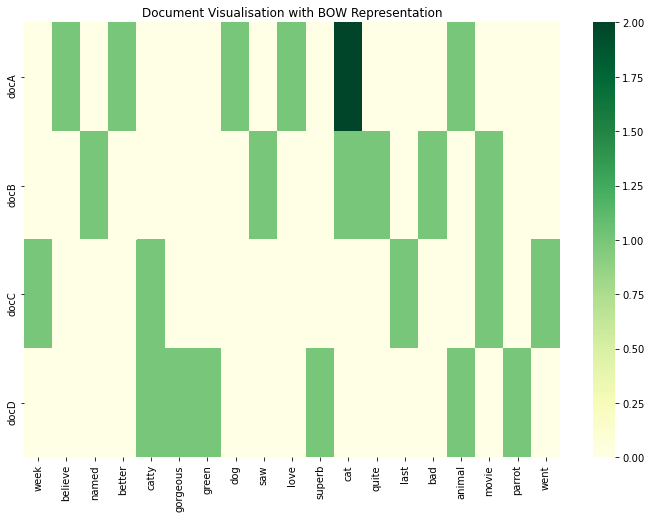

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df, cmap='YlGn')
plt.title('Document Visualisation with BOW Representation')
plt.show()

In [18]:
df_mean = df.mean().sort_values(ascending=False).to_frame(name='occurence mean')

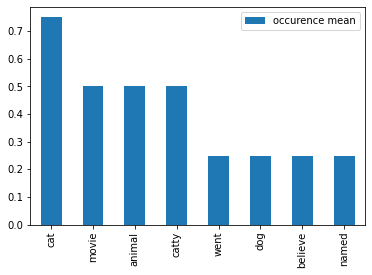

In [19]:
df_mean[:8].plot.bar()
plt.show()

## On a book 

In [20]:
alice_sentence_clean[10]

['first',
 'tried',
 'look',
 'make',
 'coming',
 'dark',
 'see',
 'anything',
 'looked',
 'side',
 'well',
 'noticed',
 'filled',
 'cupboard',
 'book-shelves',
 'saw',
 'map',
 'picture',
 'hung',
 'upon',
 'peg']

In [21]:
wordSet_alice = list(set().union(*alice_sentence_clean))
wordSet_alice[:10]

['twinkle',
 'blame',
 'great',
 'dream',
 'tale',
 'uglifying',
 "'exactly",
 'air.',
 'courtier',
 'closed']

In [22]:
print("The size of the vocabulary is:", len(wordSet_alice))

The size of the vocabulary is: 2483


### Whats would be the size of our Document Term Matrix ? 

In [23]:
# Initialization of the vocabulary frequency to zero for every word
# Here we build a list of dictionnaries, one for each sentence. 
# Keys of those dictionnaries represent words from the vocab, and the count is initialize to zero
wordDict_alice = []
for i in range(len(alice_sentence_clean)):
    wordDict_alice.append(dict.fromkeys(wordSet_alice, 0))

In [24]:
#print(len(wordDict_alice))
#print(len(wordDict_alice[0]))

In [25]:
#wordDict_alice[:3]

In [26]:
# Iterate over sentence and then over word to increment vocabulary frequency
for i, sent in enumerate(alice_sentence_clean): 
    for word in sent:
        wordDict_alice[i][word]+=1
        
# wordDict

In [27]:
df = pd.DataFrame(wordDict_alice)
print(df.shape)
df.head()

(1625, 2483)


,twinkle,blame,great,dream,tale,uglifying,'exactly,air.,courtier,closed,...,bursting,box,sooner,therefore,branch,loudly,crawled,'why,pleaded,latin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


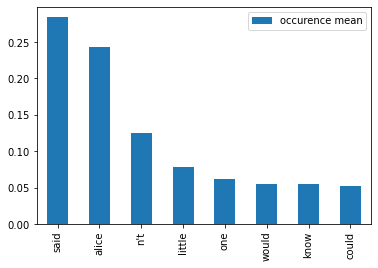

In [28]:
df_mean = df.mean().sort_values(ascending=False).to_frame(name='occurence mean')
df_mean[:8].plot.bar()
plt.show()

In [29]:
df['said'].sum()

462

# TFIDF

## On our sentences

### Term Frequency

In [30]:
docs

['I believe cats are better animals than dogs, I love cats !',
 'I saw this movie named cats, it was quite bad',
 'I went to the movies with catty last week',
 'Catty has a gorgeous animal : a superb green parrot !']

In [31]:
#wordDict

In [32]:
def compute_TF(wordDict, tokens):
    tfDict = {}
    bowCount = len(tokens)
    for word, count in wordDict.items():
        if bowCount>0:
            tfDict[word] = count/float(bowCount)
        else:
            tfDict[word] = 0
    return tfDict

In [33]:
tfBow = []
for i in range(len(clean_docs)):
    tfBow.append(compute_TF(wordDict[i], clean_docs[i]))

In [34]:
clean_docs[0]

['believe', 'cat', 'better', 'animal', 'dog', 'love', 'cat']

In [35]:
tfBow[0]

{'week': 0.0,
 'believe': 0.14285714285714285,
 'named': 0.0,
 'better': 0.14285714285714285,
 'catty': 0.0,
 'gorgeous': 0.0,
 'green': 0.0,
 'dog': 0.14285714285714285,
 'saw': 0.0,
 'love': 0.14285714285714285,
 'superb': 0.0,
 'cat': 0.2857142857142857,
 'quite': 0.0,
 'last': 0.0,
 'bad': 0.0,
 'animal': 0.14285714285714285,
 'movie': 0.0,
 'parrot': 0.0,
 'went': 0.0}

In [36]:
2/7

0.2857142857142857

### Inverse document frequency (IDF)

In [37]:
import math
def compute_IDF(wordDict):
    idfDict = {}
    N = len(wordDict)
    idfDict = dict.fromkeys(wordDict[0].keys(), 0)
    for doc in wordDict:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1 #if the word is in the document
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
#         idfDict[word] = N / float(val)
# Now there are few other problems with the IDF, in case of a large corpus,
# say 10,000, the IDF value explodes. So to dampen the effect we take log of IDF.
    return idfDict

In [38]:
docs

['I believe cats are better animals than dogs, I love cats !',
 'I saw this movie named cats, it was quite bad',
 'I went to the movies with catty last week',
 'Catty has a gorgeous animal : a superb green parrot !']

In [39]:
idfs = compute_IDF(wordDict)
idfs

{'week': 0.6020599913279624,
 'believe': 0.6020599913279624,
 'named': 0.6020599913279624,
 'better': 0.6020599913279624,
 'catty': 0.3010299956639812,
 'gorgeous': 0.6020599913279624,
 'green': 0.6020599913279624,
 'dog': 0.6020599913279624,
 'saw': 0.6020599913279624,
 'love': 0.6020599913279624,
 'superb': 0.6020599913279624,
 'cat': 0.3010299956639812,
 'quite': 0.6020599913279624,
 'last': 0.6020599913279624,
 'bad': 0.6020599913279624,
 'animal': 0.3010299956639812,
 'movie': 0.3010299956639812,
 'parrot': 0.6020599913279624,
 'went': 0.6020599913279624}

In [40]:
# Lets do the calculus for the word 'cat'
math.log10(4 / 2)

0.3010299956639812

In [41]:
def compute_TFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [42]:
tfidf = []
for i in range(len(tfBow)):
    tfidf.append(compute_TFIDF(tfBow[i], idfs))

In [43]:
tfidf = pd.DataFrame(tfidf, index=['docA', 'docB', 'docC', 'docD'])
tfidf.head()

,week,believe,named,better,catty,gorgeous,green,dog,saw,love,superb,cat,quite,last,bad,animal,movie,parrot,went
docA,0.000000,0.086009,0.000000,0.086009,0.000000,0.000000,0.000000,0.086009,0.000000,0.086009,0.000000,0.086009,0.000000,0.000000,0.000000,0.043004,0.000000,0.000000,0.000000
docB,0.000000,0.000000,0.100343,0.000000,0.000000,0.000000,0.000000,0.000000,0.100343,0.000000,0.000000,0.050172,0.100343,0.000000,0.100343,0.000000,0.050172,0.000000,0.000000
docC,0.120412,0.000000,0.000000,0.000000,0.060206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120412,0.000000,0.000000,0.060206,0.000000,0.120412
docD,0.000000,0.000000,0.000000,0.000000,0.050172,0.100343,0.100343,0.000000,0.000000,0.000000,0.100343,0.000000,0.000000,0.000000,0.000000,0.050172,0.000000,0.100343,0.000000


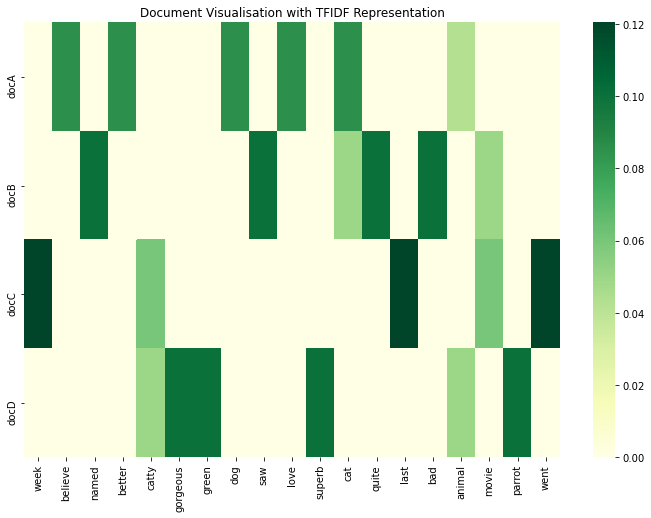

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf, cmap='YlGn')
plt.title('Document Visualisation with TFIDF Representation')
plt.show()

In [45]:
# This representation is not that meaningful applied to sentences. It is more used with press articles or longer documents in context of information retrieval or classification.
# The idea here is to show you the tools and methods, your job to create meaninful analysis from those ! 

In [46]:
# print('A few words with lowest tfidf\n\n',tfidf.apply(sum).sort_values()[:3])
# print('\n\nWords with largest tfidf\n\n',tfidf.apply(sum).sort_values()[-3:])

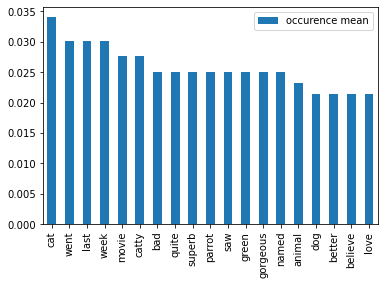

In [47]:
tfidf_mean = tfidf.mean().sort_values(ascending=False).to_frame(name='occurence mean')
tfidf_mean.plot.bar()
plt.show()

## On our book

In [48]:
# TF
tfBow_alice = []
for i in range(len(alice_sentence_clean)):
    tfBow_alice.append(compute_TF(wordDict_alice[i], alice_sentence_clean[i]))

In [49]:
# IDF
idfs_alice = compute_IDF(wordDict_alice)

In [50]:
# TFIDF
tfidf_alice = []
for i in range(len(tfBow_alice)):
    tfidf_alice.append(compute_TFIDF(tfBow_alice[i], idfs_alice))

In [51]:
tfidf_alice = pd.DataFrame(tfidf_alice)
print(tfidf_alice.shape)
tfidf_alice.head()

(1625, 2483)


,twinkle,blame,great,dream,tale,uglifying,'exactly,air.,courtier,closed,...,bursting,box,sooner,therefore,branch,loudly,crawled,'why,pleaded,latin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
print('We have', len(tfidf_alice.columns), 'words considered in our vocabulary')

We have 2483 words considered in our vocabulary


## Using libraries

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [54]:
corpus_alice = [' '.join(sentence) for sentence in alice_sentence_clean]

In [55]:
corpus_alice[:3]

['alice adventure wonderland lewis carroll 1865 chapter',
 "rabbit-hole alice beginning get tired sitting sister bank nothing twice peeped book sister reading picture conversation 'and use book thought alice 'without picture conversation",
 'considering mind well could hot day made feel sleepy stupid whether pleasure making daisy-chain would worth trouble getting picking daisy suddenly white rabbit pink eye ran close']

In [56]:
vect_corpus = vectorizer.fit_transform(corpus_alice)

In [57]:
feature_names = np.array(vectorizer.get_feature_names())
df_tfidf = pd.DataFrame(vect_corpus.todense(), columns = feature_names)
df_tfidf.head()

,1865,_i_,abide,able,absence,absurd,acceptance,accident,accidentally,account,...,year,yelled,yelp,yer,yes,yesterday,young,youth,zealand,zigzag
0,0.439663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df_tfidf_mean = df_tfidf.mean().sort_values(ascending=False).to_frame(name='tfidf mean')
df_tfidf_mean.head()

,tfidf mean
said,0.062884
alice,0.049575
know,0.017743
like,0.015967
thought,0.015310


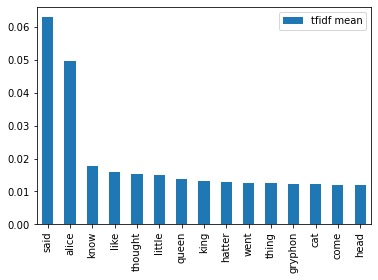

In [59]:
df_tfidf_mean[:15].plot(kind='bar')
plt.show()

# WordCloud

In [60]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

In [61]:
dict_words_tfidf = df_tfidf_mean[df_tfidf_mean['tfidf mean'] != 0].to_dict()['tfidf mean']

In [62]:
#dict_words_tfidf

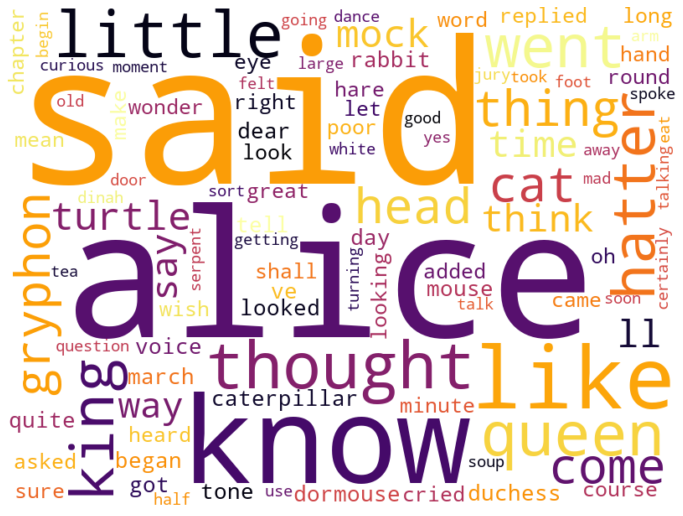

In [63]:
wordcloud = WordCloud(height=600, width=800, background_color="white", colormap='inferno', max_words=100)
wordcloud.generate_from_frequencies(frequencies=dict_words_tfidf)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Compare with TF

In [64]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
hotel_mask = np.array(Image.open("/Users/lemeillefrancois/OneDrive - Capgemini/03 - Projet /07 - X-HEC NLP/2020/98 - Autres/hotel.jpg"))
alice_mask = np.array(Image.open("/Users/lemeillefrancois/OneDrive - Capgemini/03 - Projet /07 - X-HEC NLP/2020/98 - Autres/alice.jpg"))
alice_mask2 = np.array(Image.open("/Users/lemeillefrancois/OneDrive - Capgemini/03 - Projet /07 - X-HEC NLP/2020/98 - Autres/alice2.jpg"))



In [65]:
vectorizer_bis = TfidfVectorizer(stop_words='english',ngram_range=(1,1), use_idf=False)

In [66]:
vect_corpus = vectorizer_bis.fit_transform(corpus_alice)
feature_names = np.array(vectorizer_bis.get_feature_names())
df_tf = pd.DataFrame(vect_corpus.todense(), columns = feature_names)

df_tf_mean = df_tf.mean().sort_values(ascending=False).to_frame(name='tf mean')
dict_words_tf = df_tf_mean[df_tf_mean['tf mean'] != 0].to_dict()['tf mean']

In [67]:
#dict_words_tf

In [68]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.aljanh.net/data/archive/img/2568178624.jpeg")

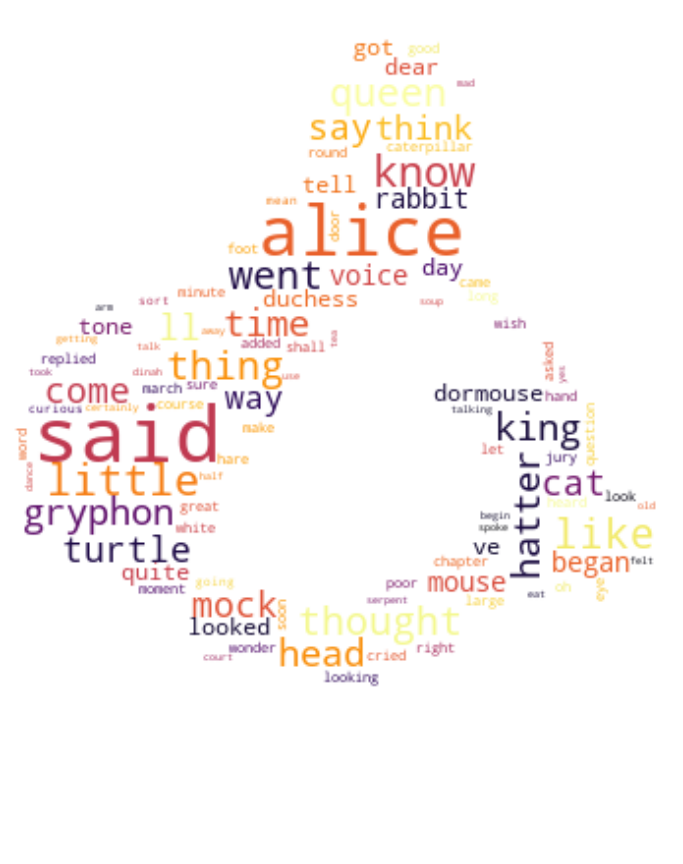

In [69]:
wordcloud = WordCloud(height=600, width=800, background_color="White", colormap='inferno', max_words=100, mask=alice_mask)
wordcloud.generate_from_frequencies(frequencies=dict_words_tf)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [70]:
Image(url='https://webstockreview.net/images/flamingo-clipart-jpeg-19.gif')

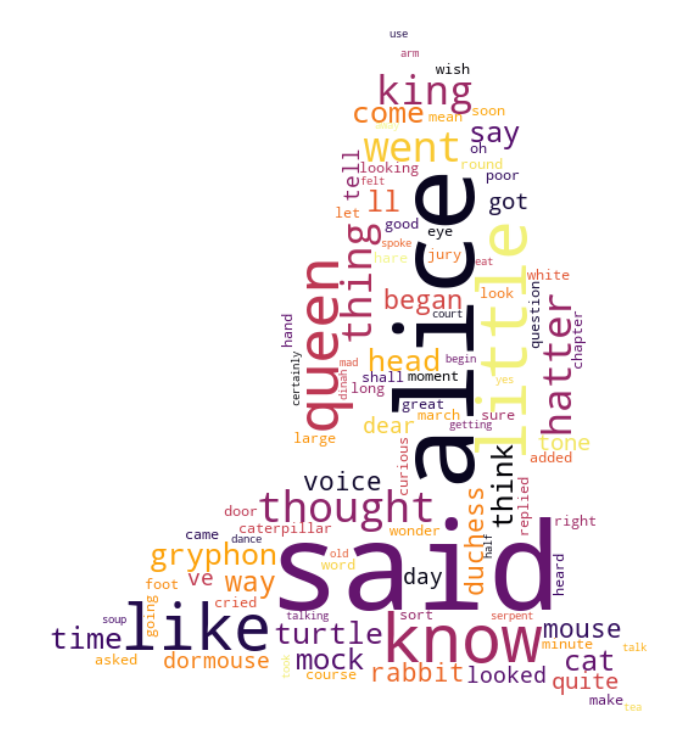

In [71]:
wordcloud = WordCloud(height=600, width=800, background_color="white",
                      colormap='inferno', max_words=100, mask=alice_mask2)
wordcloud.generate_from_frequencies(frequencies=dict_words_tf)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## End of this hands-on, your turn to code ! 